### Data transformation and visualiztion note book
#### Section micro
### Solved for varying dilutions and number of samples


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# get the data
a = pd.read_csv('data/forReview_RAoctB.csv')

In [3]:
# this is a duplicate value in the DF, data was moved(added as a record)
a.drop(12, inplace=True)

In [4]:
a.drop(38, inplace=True)

In [5]:
# this is "record data" each row corresponds to an event:
### each event is a water sample from a location on particular day
#### for each event there are three samples, those three samples get split between three agar plates
##### each plate can have a total result of x_total = x1 + x2 +...+ x6
###### x1 ... x6 are subtotals that can be compared across dates and/or locations
# do the steps to get the descriptive statistics
# create output that can be used by : javaScript, django, bokeh
### at a granularity appropriate to establish an accurate assesment of the laboratory results
a_cols = list(a.columns)
def print_this_list(a):
    for x in a:
        print(x)
print(a_cols)
#check the columns

['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'Image_24h_fluo_plate_one', 'P1_fluo_halo_colonies', 'P1_fluo_other', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h', 'Plate_one_48h_image', 'P1_48h_big_blue', 'P1_48h_med_blue', 'P1_48h_green', 'P1_48h_turq', 'P1_48h_pink', 'P1_48h_other', 'Comments_p1_48h', 'P2_qty_sample', 'Image_24h_fluo_plate_two', 'P2_fluo_halo_colonies', 'P2_fluo_other', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'Plate_two_48h_image', 'P2_48h_big_blue', 'P2_48h_med_blue', 'P2_48h_green', 'P2_48h_turq', 'P2_48h_pink', 'P2_48h_other', 'Comments_p2_48h', 'P3_qty_sample', 'Image_24h_fluo_plate_three', 'p3_fluo_halo_colonies', 'p3_fluo_other', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blu

In [6]:
# go in a terminal and check the date column
# it is in %y%.m%.d format
# for whatever reason the pd,datetime did not recoginze the data 17.06.12
# it flipped it to : 17.12.06 ---- which wont work
# so use some list index and str properties to make this right
b = a['Date'].copy()
new_dates = []
new_dic = {}
for x in b:
    year = '20'+str(x[6:])
    day = x[:2]
    month = x[3:5]
    new_d = year + '/' + str(month) + '/' + str(day)
    new_dates.append({x:new_d})
    new_dic.update({x:new_d})
new_dates[:10]

a['Date'] = a['Date'].map(new_dic)
a['Date'][:10]

0    2017/06/12
1    2017/06/12
2    2017/06/12
3    2017/06/12
4    2017/06/12
5    2017/06/12
6    2017/06/19
7    2017/06/19
8    2017/06/19
9    2017/06/19
Name: Date, dtype: object

In [7]:
# So there are alot of columns here
# index will be
# 'Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation',
# I want that with each record for now

plate_one = ['P1_qty_sample',
             'Image_24h_fluo_plate_one',
             'P1_fluo_halo_colonies',
             'P1_fluo_other',
             'Plate_one_24h_image',
             'P1_24h_big_blue',
             'P1_24h_med_blue',
             'P1_24h_green',
             'P1_24h_turq',
             'P1_24h_pink',
             'P1_24h_other',
             'Comments_p1_24h',
             'Plate_one_48h_image',
             'P1_48h_big_blue',
             'P1_48h_med_blue',
             'P1_48h_green',
             'P1_48h_turq',
             'P1_48h_pink',
             'P1_48h_other',
             'Comments_p1_48h']

In [8]:
plate_two = ['P2_qty_sample',
             'Image_24h_fluo_plate_two',
             'P2_fluo_halo_colonies',
             'P2_fluo_other',
             'Plate_two_24h_image',
             'P2_24h_big_blue',
             'P2_24h_med_blue',
             'P2_24h_green',
             'P2_24h_turq',
             'P2_24h_pink',
             'P2_24h_other',
             'Comments_p2_24h',
             'Plate_two_48h_image',
             'P2_48h_big_blue',
             'P2_48h_med_blue',             
             'P2_48h_green',
             'P2_48h_turq',
             'P2_48h_pink',
             'P2_48h_other',
             'Comments_p2_48h']

In [9]:
plate_three = ['P3_qty_sample',
               'Image_24h_fluo_plate_three',
               'p3_fluo_halo_colonies',
               'p3_fluo_other',
               'Plate_three_24h_image',
               'P3_24h_big_blue',
               'P3_24h_med_blue',
               'P3_24h_green',
               'P3_24h_turq',
               'P3_24h_pink',
               'P3_24h_other',
               'Comments_p3_24h',
               'Plate_three_48h_image',
               'P3_48h_big_blue',
               'P3_48h_med_blue',
               'P3_48h_green',
               'P3_48h_turq',
               'P3_48h_pink',
               'P3_48h_other',
               'Comments_p3_48h'] 

In [10]:
map_it = ['Location','latitude', 'longitude']

In [11]:
index = ['Date',
         'Location',
         'medium',
         'Samples',
         'Sampling_Notes',
         'Water_temp',
         'Plating_notes',
         'Temp_incubation',]

In [12]:
# so the info repeats it self for each plate
# set up lists and variables to keep track of all that
# make sure that all the column names are accounted for
# we have yet to account for 'location_image'
def count_it(a):
    n = 0
    for x in a:
        a = len(x)
        n += a
    return n
groups = [index, map_it, plate_one, plate_two, plate_three]
print(count_it(groups), len(a_cols))
# the count works because the column 'location image' is not included

71 71


In [13]:
loc_image = ['Date', 'Location', 'Location_Image']
groups.append(loc_image)
print(count_it(groups), len(a_cols))
#should be plus three

74 71


In [14]:
# okay onwards
# break the results into time scale (beacuase i can)
# the info repeats it self
# this should get dwon to a series of lists
# if executed in right sequence as variables 
# will extract all possible combinations of the data provided
plate_one_24 = ['P1_qty_sample',
                'Plate_one_24h_image',
                'P1_24h_big_blue',
                'P1_24h_med_blue',
                'P1_24h_green',
                'P1_24h_turq',
                'P1_24h_pink',
                'P1_24h_other',
                'Comments_p1_24h',]
             
plate_one_48 = ['P1_qty_sample',
                'Plate_one_48h_image',
                'P1_48h_big_blue',
                'P1_48h_med_blue',
                'P1_48h_green',
                'P1_48h_turq',
                'P1_48h_pink',
                'P1_48h_other',
                'Comments_p1_48h']


In [15]:
# these can also be constructed using a list index method
plate_two_24 = ['P2_qty_sample',
                'Plate_two_24h_image',
                'P2_24h_big_blue',
                'P2_24h_med_blue',
                'P2_24h_green',
                'P2_24h_turq',
                'P2_24h_pink',
                'P2_24h_other',
                'Comments_p2_24h']

plate_two_48 = ['P2_qty_sample',
                'Plate_two_48h_image',
                'P2_48h_big_blue',
                'P2_48h_med_blue',             
                'P2_48h_green',
                'P2_48h_turq',
                'P2_48h_pink',
                'P2_48h_other',
                'Comments_p2_48h']

In [16]:
plate_three_24 = ['P3_qty_sample',
                  'Plate_three_24h_image',
                  'P3_24h_big_blue',
                  'P3_24h_med_blue',
                  'P3_24h_green',
                  'P3_24h_turq',
                  'P3_24h_pink',
                  'P3_24h_other',
                  'Comments_p3_24h',]
               
plate_three_48 = ['P3_qty_sample',
                  'Plate_three_48h_image',
                  'P3_48h_big_blue',
                  'P3_48h_med_blue',
                  'P3_48h_green',
                  'P3_48h_turq',
                  'P3_48h_pink',
                  'P3_48h_other',
                  'Comments_p3_48h']

In [17]:
plate_one_fluo = ['Image_24h_fluo_plate_one',
                  'P1_fluo_halo_colonies',
                  'P1_fluo_other']
plate_two_fluo = ['Image_24h_fluo_plate_two',
                  'P2_fluo_halo_colonies',
                  'P2_fluo_other']
plate_three_fluo = ['Image_24h_fluo_plate_three',
                    'p3_fluo_halo_colonies',
                    'p3_fluo_other']

In [18]:
# test the list indexes:
d = np.random.randint(9, size=8)
d

array([4, 7, 4, 0, 7, 7, 2, 8])

In [19]:
# or run this at each loop
np.random.choice(9)

1

In [20]:
# this data can be seen as a whole (the sum of all the xis or seperated by incubation time)
plate_groups = [plate_one_24, plate_two_24, plate_three_24, plate_one_48, plate_two_48, plate_three_48]
plate_24 = plate_groups[:3]
plate_48 = plate_groups[3:]

In [21]:
# to check this i will grab a random number and sue it to
# index the lists created from the columns
# these will be used as lables later to call data out
# the out pt should be the same for all values x[i] where i = np.random.choice(9)

def check_indexes(a):
    n = 0
    i = np.random.choice(9)
    if n <= 4:        
        for x in a:
            print(x[i])
        print('loop')
        n += 1
        
check_indexes(plate_groups)
# okay this function can run forever and i get the same output from each group         
        

Comments_p1_24h
Comments_p2_24h
Comments_p3_24h
Comments_p1_48h
Comments_p2_48h
Comments_p3_48h
loop


In [22]:
# group the dates by week number
# first get a sorted list by date
# any way you do it there is a transformation to happen
b = a['Date'].copy()
b = pd.to_datetime(b, format='%Y/%m/%d')
b = list(b)
b.sort()
b = list(set(b))
b.sort()
b
# the time stamp works here but it is a hassel in js
# the value will be kept but I will also asign a week no

[Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00')]

In [23]:
weeks_l = ['Week one', 'Week two', 'Week three', 'Week four', 'Week five', 'Week six', 'Week seven', 'Week eight']
weeks = dict(zip(weeks_l, b))
print(weeks, b)

{'Week one': Timestamp('2017-06-12 00:00:00'), 'Week two': Timestamp('2017-06-19 00:00:00'), 'Week three': Timestamp('2017-06-26 00:00:00'), 'Week four': Timestamp('2017-07-03 00:00:00'), 'Week five': Timestamp('2017-07-10 00:00:00'), 'Week six': Timestamp('2017-07-17 00:00:00'), 'Week seven': Timestamp('2017-07-24 00:00:00'), 'Week eight': Timestamp('2017-07-31 00:00:00')} [Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-26 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-17 00:00:00'), Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-31 00:00:00')]


In [24]:
# makesure the orignal df is up to speed
a['Date'] = pd.to_datetime(a['Date'],format='%Y/%m/%d' )

In [25]:
# create a list of place names
places = list(a['Location'].copy())
places = set(places)
place = list(places)
place

['Echandens',
 'Hackuarium toilet',
 'MRD',
 'Nernier',
 'VNX',
 'SVT',
 'Hackuarium tap']

In [26]:
mediums = list(a['medium'].unique().copy())
mediums[0]

'easy_gel'

In [27]:
c = a[(a.Location == 'SVT') & (a.medium == 'unil_kitchen')]

In [28]:
c

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,Image_24h_fluo_plate_one,...,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h,latitude,longitude,Location_Image
43,2017-07-24,SVT,unil_kitchen,2,No comments,19,No comments,37,0.5,SVT1-13_19_6.JPG,...,0.0,0.0,0.0,0.0,0.0,0.0,No comments,46.438207,6.905157,none
57,2017-07-03,SVT,unil_kitchen,1,added oct,22,No comments,37,0.5,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
place = ['Echandens',
         'SVT',
         'VNX',
         'MRD',
         'Nernier',
         'Hackuarium tap',
         'Hackuarium toilet']

# so now I should get a table of values
# corresponding to plate number and color for one date, and one location
# check to see what happens if use 1 of each list to slice the data-frame
c = a[(a.Location == place[4]) & (a.Date == weeks['Week one'])][[plate_one_24[2], plate_two_24[2], plate_three_24[2]]]

In [30]:
c

,P1_24h_big_blue,P2_24h_big_blue,P3_24h_big_blue
4,1.0,0.0,0.0


In [31]:
print(type(c))
# that output looks good
# create a list index for the plate counts
bugs = [2, 3, 4, 5, 6, 7]
# this is temporary and will be replaced with a list derived from the column names
# this information down here is good to know

<class 'pandas.core.frame.DataFrame'>


In [32]:
# there is already some pandas functionality here
a_sum = c.sum()
b_sum = sum(a_sum)
c_sum = sum(c.sum())

print(c_sum)
print(a_sum)

1.0
P1_24h_big_blue    1.0
P2_24h_big_blue    0.0
P3_24h_big_blue    0.0
dtype: float64


In [33]:
plate_48 = [plate_one_48, plate_two_48, plate_three_48]

In [34]:
cc = [plate_24, plate_48]
big_blue, med_blue, green, turq, pink, other = [], [], [], [], [], []
for x in cc:
    for plate in x:        
        big_blue.append(plate[2])
        med_blue.append(plate[3])
        green.append(plate[4])
        turq.append(plate[5])
        pink.append(plate[6])
        other.append(plate[7])
#big_blue         

In [35]:
#b is our list of dates
dates = b
all_colors = [big_blue, med_blue, green, turq, pink, other]

In [36]:
one_s = [0,3]
two_s = [0,1,3,4]
second_s = [1,4]
third_s = [2, 5]

In [37]:
def make_samples(x,y):
    d = []
    for i, a in enumerate(x):
        color = []
        for n, b in enumerate(y):
            c = x[i][b]
            color.append(c)
        d.append(color)
    return d
one_sample = make_samples(all_colors, one_s)
two_sample = make_samples(all_colors, two_s)
second_sample = make_samples(all_colors, second_s)
third_sample = make_samples(all_colors, third_s)
# all_colors is for three samples
#samp_one   

In [38]:
# weeks has the key type 'Week one', 'Week two'....
# Will need to call week be by date
# so weeks 2 has the key type Timestamp('2017-06-12 00:00:00')
weeks_2 = dict(zip(b, weeks_l))

In [39]:
# will go ahead and make dictionaries for the variables
# easier to use than remembering abbreviations
#mediums
med_keys = ['ez', 'card', 'unil', 'lev']
medium = dict(zip(med_keys, mediums))
place_keys = ['ech', 'svt', 'vnx', 'mrd', 'ner', 'tap', 'toilet']
places = dict(zip(place_keys, place))

In [40]:
# so should be able to call the row week two, for one sample(plate one), any place, any plate number
a[(a.Date == weeks['Week five']) & (a.Location == places['vnx']) & (a.medium == medium['card'])][all_colors[5]]

,P1_24h_other,P2_24h_other,P3_24h_other,P1_48h_other,P2_48h_other,P3_48h_other
61,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#all_colors

In [60]:
import re
p = re.compile('tmtc', re.IGNORECASE)
def weekly_results(df, week, places, meds):
    all_results2 = []
    for n, place in enumerate(places):
        print(place)
        chart_it2 = {place:[]}
        the_results2 = []
        for a, b in enumerate(week):
            e = df[(df.Date == weeks[week[a]]) & (df.Location == place) & (df.medium == medium[meds])]
            
            if e['Samples'].values.size == 0:
                no_t = medium[meds] + ' not used'
                no_test = {'no_test': no_t}
                the_results2.append([{weeks_2[weeks[b]]:no_test}]) 
                
            elif e['Samples'].values[0] == 1:
                samples = one_sample
                num_samps = 1       
                
            elif e['Samples'].values[0] == 2:
                samples = two_sample
                num_samps = 2
                            
            elif e['Samples'].values[0] == 3:
                samples = all_colors
                num_samps = 3
            
            if e['Samples'].values.size > 0:
                comments = list(e['Comments_p1_24h'])
                samps = {'num samps': num_samps}
                dose = {'dilution': e[plate_one[0]].item()}
                if len(comments) ==1:
                    
                    if p.search(comments[0]):
                        bdl={'TMTC':''}
                    else:
                        bdl={'BDL':''}
                
                day_results2 = []
                string = []
                for c, d in enumerate(samples):
                    f = e[d]
                    
                    if sum(f.sum()) == 0:
                        for s in d:
                            if d[0][7:] not in string:
                                string.append(d[0][7:])
                    
                    bdl[list(bdl.keys())[0]] = ', '.join(string)
                    g = list(e[d].sum())
                    #print(g)
                    g_l = []
                    for h in g:
                        if h == 0:
                            g_l.append(h)
                        if h > 0:
                            g_l.append(np.log(h))
                    #print(g_l)
                    g_m = np.mean(g_l)
                    #print(g_m, weeks_2[weeks[b]],d)
                    g_s = np.std(g_l)
                    #print(g_s)
                    f_95 = g_m+ g_s*1.649
                    #print(f_95, weeks_2[weeks[b]])
                    f_95 = np.exp(f_95).round(2)
                    #print(f_95, weeks_2[weeks[b]])
                    #print(e[plate_one[0]].item())
                    if e[plate_one[0]].item() == 0.5:
                        f_95 = f_95 * 200
                    elif e[plate_one[0]].item() == 1:
                        f_95 = f_95 * 100
                    elif e[plate_one[0]].item() == 4:
                        f_95 = f_95 * 25
                    day_results2.append(f_95)
                    #print(f_95)
                    #print('loop')
                #print(weeks[week[a]], day_results2)
            
                the_results2.append([{weeks_2[weeks[b]]:day_results2}, bdl, samps, dose])
                print(the_results2)
            chart_it2[place] = the_results2
        all_results2.append(chart_it2)
    
    return all_results2
               
                
all_s = weekly_results(a, weeks_l, place[:4], 'ez')  

Echandens
[[{'Week one': [2632.0, 12724.0, 200.0, 200.0, 1254.0, 2632.0]}, {'BDL': 'green, turq'}, {'num samps': 1}, {'dilution': 0.5}]]
[[{'Week one': [2632.0, 12724.0, 200.0, 200.0, 1254.0, 2632.0]}, {'BDL': 'green, turq'}, {'num samps': 1}, {'dilution': 0.5}], [{'Week two': [7223.999999999999, 9196.0, 200.0, 200.0, 8526.0, 200.0]}, {'BDL': 'green, other'}, {'num samps': 1}, {'dilution': 0.5}]]
[[{'Week one': [2632.0, 12724.0, 200.0, 200.0, 1254.0, 2632.0]}, {'BDL': 'green, turq'}, {'num samps': 1}, {'dilution': 0.5}], [{'Week two': [7223.999999999999, 9196.0, 200.0, 200.0, 8526.0, 200.0]}, {'BDL': 'green, other'}, {'num samps': 1}, {'dilution': 0.5}], [{'Week three': [16512.0, 22190.0, 200.0, 200.0, 7223.999999999999, 200.0]}, {'BDL': 'green, turq, other'}, {'num samps': 1}, {'dilution': 0.5}]]
[[{'Week one': [2632.0, 12724.0, 200.0, 200.0, 1254.0, 2632.0]}, {'BDL': 'green, turq'}, {'num samps': 1}, {'dilution': 0.5}], [{'Week two': [7223.999999999999, 9196.0, 200.0, 200.0, 8526.0, 

[[{'Week one': [25.0, 25.0, 25.0, 25.0, 25.0, 25.0]}, {'BDL': 'big_blue, med_blue, green, turq, pink, other'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week two': [25.0, 210.0, 25.0, 43.0, 304.0, 273.5]}, {'BDL': 'big_blue, green'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week three': [77.5, 314.0, 25.0, 25.0, 130.5, 25.0]}, {'BDL': 'green, turq, other'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week four': [373.5, 356.75, 25.0, 25.0, 111.5, 25.0]}, {'BDL': 'green, other'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week five': [100.0, 2260.0, 100.0, 100.0, 3304.9999999999995, 2034.0]}, {'BDL': 'big_blue, turq'}, {'num samps': 3}, {'dilution': 1.0}]]
[[{'Week one': [25.0, 25.0, 25.0, 25.0, 25.0, 25.0]}, {'BDL': 'big_blue, med_blue, green, turq, pink, other'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week two': [25.0, 210.0, 25.0, 43.0, 304.0, 273.5]}, {'BDL': 'big_blue, green'}, {'num samps': 3}, {'dilution': 4.0}], [{'Week three': [77.5, 314.0, 25.0, 25.0, 130.5, 25.0]}, {'BDL': 'green

In [61]:
from textwrap import wrap
def plot_weekly_totals(x):
    rows = len(weeks_l)
    cols = len(x) +1
    ind = np.arange(6)
    width = 1
    colss = ['darkblue', 'dodgerblue', 'green', 'turquoise', 'pink', 'lightslategray']

    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    f.subplots_adjust(hspace=0.9, wspace=0.3)

    for i, n in enumerate(x):
        if i == 0:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                        
                    else:
                        axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) + 'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    if type(k[0][weeks_l[j]]) == dict:
                        axar[j, i+1].text(0.2, 0.5, k[0][weeks_l[j]]['no_test'], fontsize=10)
                        axar[j, i+1].set_title(key)
                       
                    else:
                        axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                        axar[j, i+1].set_title(key + ', samples: ' + str(list(k[2].values())[0]) + ', ' + str(list(k[3].values())[0]) +'mL')
                        axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                        axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                        if max(k[0][weeks_l[j]]) == 25:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                        else:
                            axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
    plt.savefig('ez_Grid.svg')
    plt.savefig('ez_Grid.png')
    plt.show()

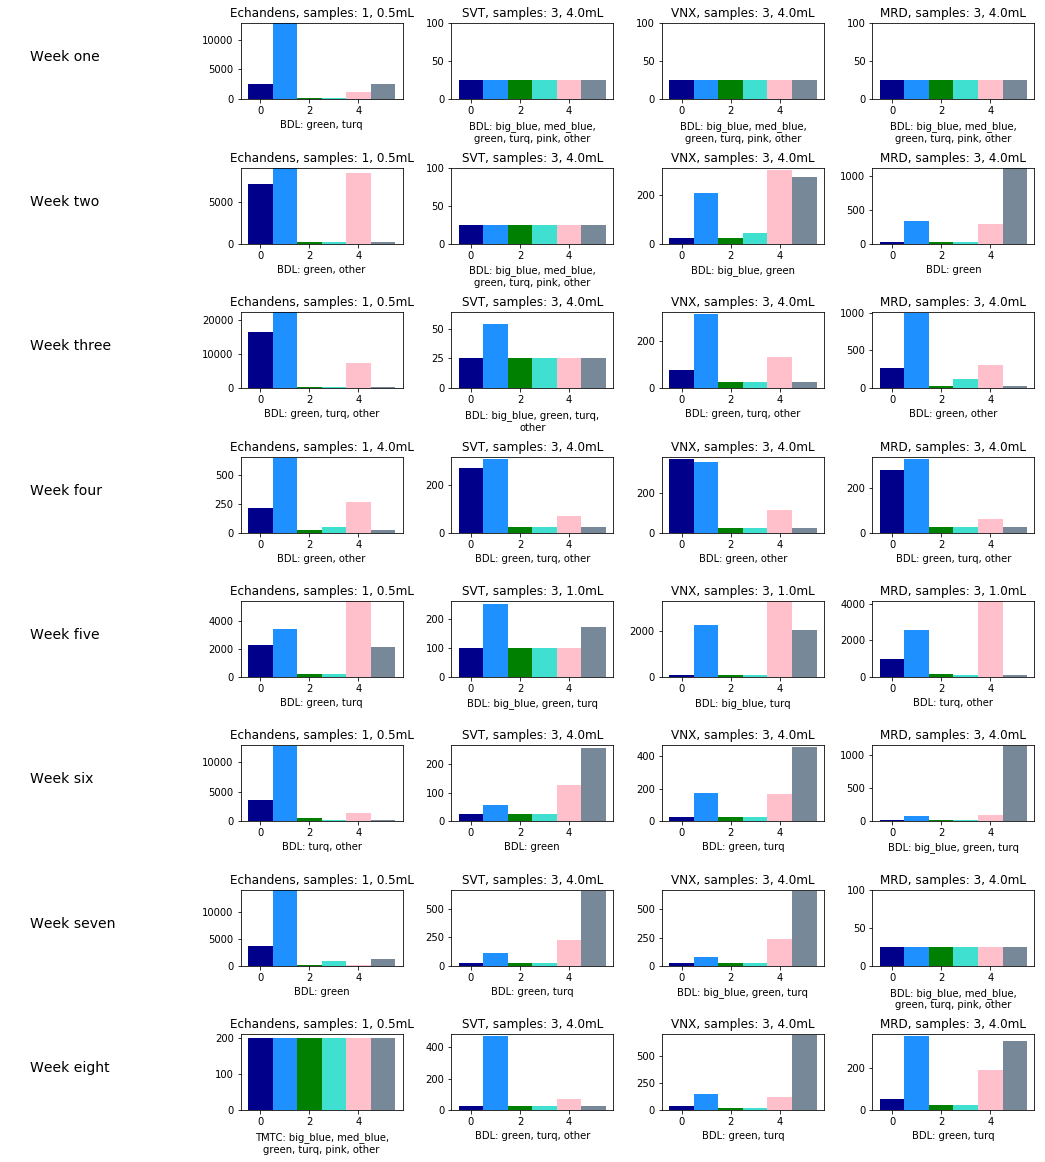

In [62]:
plot_weekly_totals(all_s)

In [45]:
all_results = []
import re
p = re.compile('tmtc', re.IGNORECASE)
for n, beach in enumerate(place[:4]):
    chart_it = {beach:[]}
    the_results = []
    for i, date in enumerate(dates):        
        zz = a[(a.Date == date) & (a.Location == beach ) & (a.medium == 'easy_gel')]
        comments = list(zz['Comments_p1_24h'])
        if len(comments) ==1:
            if p.search(comments[0]):
                bdl={'TMTC':''}
            else:
                bdl={'BDL':''}
        day_results = []
        string = []
        for n, sample in enumerate(all_colors):
            qi = zz[sample]
            if sum(qi.sum()) == 0:
                for s in sample:
                    if sample[0][7:] not in string:
                        string.append(sample[0][7:])
            bdl[list(bdl.keys())[0]] = ', '.join(string)
            yy = list(zz[sample].sum())
            yr = []
            for d in yy:
                if d == 0:
                    yr.append(d)
                if d > 0:
                    yr.append(np.log(d))
            yg = np.mean(yr)
            yh = np.std(yr)
            f_95 = yg+yh*1.649
            f_95 = np.exp(f_95).round(2)
            if zz[plate_one[0]].item() == 0.5:
                f_95 = f_95 * 200
            elif zz[plate_one[0]].item() == 1:
                f_95 = f_95 * 100
            elif zz[plate_one[0]].item() == 4:
                f_95 = f_95 * 25
            day_results.append(f_95) 
        the_results.append([{weeks_2[date]:day_results}, bdl])        
    chart_it[beach] = the_results
    all_results.append(chart_it)

In [46]:
from textwrap import wrap
def plot_weekly_totals(x):
    rows = len(weeks_l)
    cols = len(x) +1
    ind = np.arange(6)
    width = 1
    colss = ['darkblue', 'dodgerblue', 'green', 'turquoise', 'pink', 'lightslategray']

    f, axar = plt.subplots(rows, cols, figsize=(18,20))
    f.subplots_adjust(hspace=0.9, wspace=0.3)

    for i, n in enumerate(x):
        if i == 0:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i].text(0, 0.5, weeks_l[j], fontsize=14)
                    axar[j, i].set_axis_off()
                    axar[j, i+1].bar(ind, k[0][weeks_l[j]], width, color=colss)
                    axar[j, i+1].set_title(key)
                    axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                    axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                    if max(k[0][weeks_l[j]]) == 25:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                    else:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
        else:
            for key, value in x[i].items():
                for j, k in enumerate(value):
                    axar[j, i+1].bar(ind,  k[0][weeks_l[j]],width, color=colss)
                    axar[j, i+1].set_title(key)
                    axis_label = '\n'.join(wrap(list(k[1].values())[0], 24))
                    axar[j, i+1].set_xlabel(list(k[1].keys())[0] +': '+ axis_label)
                    if max(k[0][weeks_l[j]]) == 25:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 75)
                    else:
                        axar[j, i+1].set_ylim(0, max(k[0][weeks_l[j]]) + 10)
                    
    plt.savefig('ez_gelGrid.svg')
    plt.savefig('ez_gel_Grid.png')
    plt.show()

## Results aggregated easy gel -- all plates
### 95th percentile -- P95 = mean + std*1.649
#### if a chart is bumped up against a limit that means the results are less than the detectable limit ie... week one: (SVT,VNX,MRD) for that dilution or TMTC ie.. week eight Echandens --- the reslult was given as zero in the file


### BDL = 'Below detectable limit', TMTC = 'Too many to count'
#### The color and whether BDL or TMTC  is noted on the X-Axis label



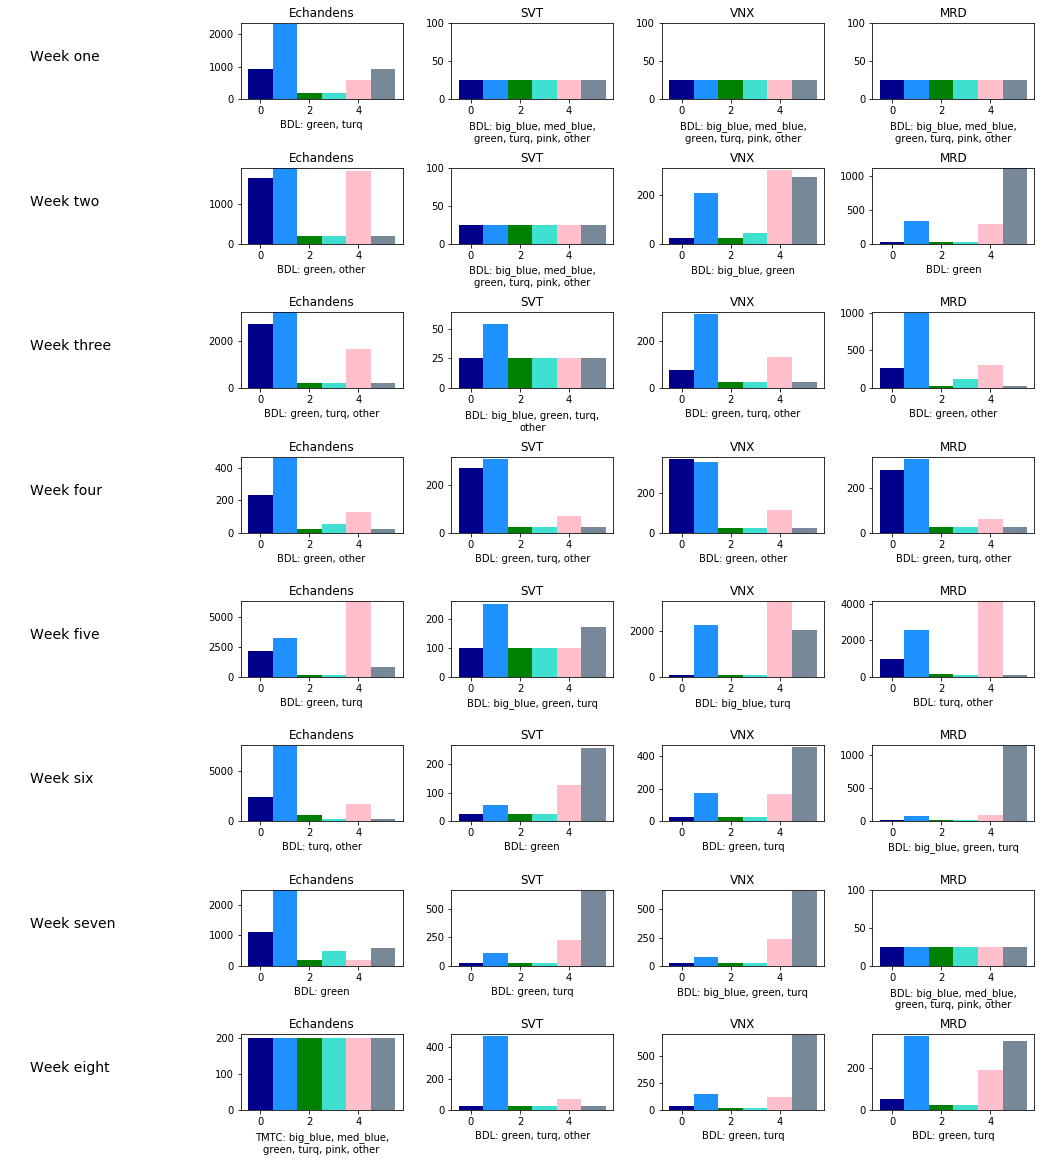

In [47]:
plot_weekly_totals(all_results)

In [48]:
# def averages(df, date, places, medium, one_sample, two_sample, three_sample):
#     for day in date:
#         total = 0
#         average = 0
#         nine_5 = 0
#         for place in places:
#             if place in list(df[(df.date == day)]['Location']):
#                 record = df[(df.Date == day) & (df.Location == places) & (df.medium == medium)]
#                 if record['Samples'].item() == 1:
#                     # then list 'one_sample" has the columns
#                     for sample in one_sample:
#                         a = record[sample]
#                         total += sum(a.sum())
#                         average += np.mean(a.sum())
#                 elif record['Samples'].item() == 2:
#                     # then list 'two_sample' has the columns
#                     for sample in two_sample:
#                         a = record[sample]
#                         total += sum(a.sum())
#                         total += sum(a.sum())
#                         average += np.mean(a.sum())
#                 elif record['Samples'].item() == 3:
#                     # then list 'three_sample' has the columns
#                     for sample in three_sample:
#                         a = record[sample]
#                         total += sum(a.sum())
#                         average += np.mean(a.sum())
                
        
        
             
            
    